# Project: Wrangle and Analyze Data

##                        By Ayame God'swill Claude

## Data Gathering
In the cells below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

In [2]:
# To import and read the given WeRateDogs Twitter archive dataset (I choose to call df_1) into a pandas dataframe

df_1 = pd.read_csv('twitter_archive_enhanced.csv')

# to check to see if the file was imported correctly
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# to check to confirm if the number of entries/records is complete

df_1.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image-predictions.tsv)

In [4]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_url = requests.get(url, allow_redirects=True)

# To save the html to file
with open('image-predictions.tsv', mode='wb')as file:

    file.write(image_url.content)

In [5]:
# to read the tsv file into a pandas dataframe

df_2 = pd.read_csv('image-predictions.tsv',sep='\t')

# to catch a quick glimpse of the first 5 rows of the dataset
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# to check to confirm if the number of entries/records downloaded is complete

df_2.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet-json.txt)

In [7]:
# Import statements for packages required to query additional data via Twitter's API

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [8]:
# The following code, which is provided in the Getting Started portion of the Tweepy documentation,
# will create an API object that can be used to gather Twitter data. 

# The key, token and secrets are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN KEY'                                              # my API Key
consumer_secret = 'HIDDEN SECRET'                                        # my API Key Secret
access_token = 'TOKEN SECRET'                                       
access_secret = 'ACCESS SECRET'                                          # my Access Token Secret

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# To query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()


# To write and save the JSON data to the required tweet_json.txt file with each tweet's JSON data on its own line

with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in df_1['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException  as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 258


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 269


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [9]:
# To read the JSON file, line by line

df_list = []
with open ('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append(tweet)

In [10]:
# To create a pandas dataframe (df_3)

df_3 = pd.DataFrame(df_list)

# to check to see if the file was imported correctly
df_3.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [11]:
# to check to confirm if the number of entries/records downloaded is complete

df_3.shape

(2327, 32)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### In order to carry out visual assessment (looking through the data in its entirety), the three complete data frames were included below

In [12]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
df_3

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2323,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2324,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2325,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


Next, I used the following pandas' functions and methods to carry out programmatic assessment of the three datasets as follows:

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2327 non-null   object 
 1   id                             2327 non-null   int64  
 2   id_str                         2327 non-null   object 
 3   full_text                      2327 non-null   object 
 4   truncated                      2327 non-null   bool   
 5   display_text_range             2327 non-null   object 
 6   entities                       2327 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2327 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

To generate descriptive statistics for the numerical data types in all three dataframes, the following codes were used:

In [18]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


For the tidiness issues, to find duplicate column names in the three dataframes using pandas, I used the following codes:

In [20]:
# To create a list of all of the column names across the three dataframes within the datasets 
# and put these into a series

all_columns = pd.Series(list(df_1) + list(df_2) + list(df_3))

# Then the .duplicated() method is used on the series to reveal all the  duplicates

all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

In [21]:
list(df_1)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [22]:
list(df_2)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [23]:
list(df_3)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status']

### The assessment and investigations carried out above revealed the following quality and tidiness issues, which are itemized below

## Quality issues

### From visual assessment of the three dataframes above, the following quality issues were found


#### df_3

1. The column name 'id' should be changed to 'tweet_id' for consistency with df_1 and df_2


#### df_1 (opened and visually inspected in excel spreadsheet application)
2. The columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, expanded_urls and retweeted_status_timestamp all contain missing (aka null) values (represented as NaN in pandas).

3. ThSome values/records under the column "name" show 'None' or 'a', which should not be


#### df_2
4. The columns: in_reply_to_status_id, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink and quoted_status all contain missing (aka null) values (represented as NaN in pandas). 
 
5. The datatype of the column/field created_at is not the correct format 

 


### From programmatic assessment of the three dataframes above, the following issues were found

#### df_1

6. The columns doggo, floofer, pupper and puppo are in string formats instead of categorical formats

#### df_2

7. The columns p1, p2 and p3 are in string formats instead of categorical formats.

8. Inconsistency in casing for the columns p1, p2 and p3 (sometimes begin with a lowecase letter and other times uppercase)

9. Inconsistency in the number of decimal places in the columns p1_conf, p2_conf and p3_conf

### Tidiness issues
#### From visual assessment of the three dataframes above, the following issues were found

##### df_1
1. The columns doggo, floofer, pupper and puppo all need to be combined into a single column called dog_stage

##### df_1, df_2 and df_3
2. The .duplicated() method revealed duplicate columns like tweet_id (occurs in df_1 and df_2), 
    source, in_reply_to_status_id and in_reply_to_user_id (occurs in both dataframes 1 and 3), we will 
    need to determine how many datasets we actually need. Since the variables in all 3 pieces of 
    datasets all relate to the tweet archive of Twitter user @dog_rates, also known as WeRateDogs, all 
    three datasets should be conbined into one high-quality and tidy master pandas DataFrame. 

##### df_3
3. id and id_str contain exactly same values; so one of the columns should be removed

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# To make copies of original pieces of data before commencing cleaning in order to retain original
# datasets 

df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

### Quality issue #1:

#### Define: 
Change the column name 'id' in df_3_clean to 'tweet_id' for consistency with df_1_clean and df_2_clean

#### Code

In [25]:
df_3_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [26]:
df_3_clean.head(3)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


### Tidiness Issues #1:

#### Define:
Melt the columns doggo, floofer, pupper and puppo in df_1_clean into a single column called dog_stage

#### Code

In [27]:
# To observe the list of all columns involved in df_1_clean
list(df_1_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [28]:
df_1_clean = pd.melt(df_1_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name=['dog_stage_STACKED_UP'], value_name= 'dog_stage')

# To drop the column 'value' that is created by default, since it's irrelevant in this case
df_1_clean = df_1_clean.drop('dog_stage_STACKED_UP', axis=1)

#### Test

In [29]:
df_1_clean.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None


### Tidiness Issues #2:

#### Define:

Merge dataframes 1 and 3 into a single dataframe, since they are both very similar

#### Code

In [30]:
df_1and3_clean = pd.merge(df_1_clean, df_3_clean, 
                          on=['tweet_id', 'source', 'in_reply_to_status_id', 'in_reply_to_user_id'], how='left')

#### Test

In [31]:
df_1and3_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [32]:
# To merge df_1and3_clean with df_2_clean into one master pandas dataframe

df_MASTER_clean = pd.merge(df_1and3_clean, df_2_clean, 
                          on=['tweet_id'], how='left')

In [33]:
df_MASTER_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [34]:
df_MASTER_clean.shape

(9424, 53)

### Tidiness Issues #3:

#### Define
Remove id_str column, since it's a duplicate of tweet_id column

#### Code

In [35]:
df_MASTER_clean.drop('id_str', inplace=True, axis=1)

#### Test

In [36]:
list(df_MASTER_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'created_at',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [37]:
df_MASTER_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       9424 non-null   int64  
 1   in_reply_to_status_id          312 non-null    float64
 2   in_reply_to_user_id            312 non-null    float64
 3   timestamp                      9424 non-null   object 
 4   source                         9424 non-null   object 
 5   text                           9424 non-null   object 
 6   retweeted_status_id            724 non-null    float64
 7   retweeted_status_user_id       724 non-null    float64
 8   retweeted_status_timestamp     724 non-null    object 
 9   expanded_urls                  9188 non-null   object 
 10  rating_numerator               9424 non-null   int64  
 11  rating_denominator             9424 non-null   int64  
 12  name                           9424 non-null   o

### Quality Issues #2:

#### Define: 
Remove the following columns, for either having an extremely high number of null/missing values or not even having any record at all: in_reply_to_status_id, in_reply_to_user_id, retweeted_status, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id_str, in_reply_to_user_id_str,  in_reply_to_screen_name, user, geo, coordinates, place, contributors, quoted_status_id, quoted_status_id_str, quoted_status_permalink and quoted_status  

#### Code

In [38]:
df_MASTER_clean.drop(['in_reply_to_status_id','retweeted_status', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str',  'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'], axis=1, inplace=True)

#### Test

In [39]:
df_MASTER_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       9424 non-null   int64  
 1   timestamp                      9424 non-null   object 
 2   source                         9424 non-null   object 
 3   text                           9424 non-null   object 
 4   expanded_urls                  9188 non-null   object 
 5   rating_numerator               9424 non-null   int64  
 6   rating_denominator             9424 non-null   int64  
 7   name                           9424 non-null   object 
 8   dog_stage                      9424 non-null   object 
 9   created_at                     9304 non-null   object 
 10  full_text                      9304 non-null   object 
 11  truncated                      9304 non-null   object 
 12  display_text_range             9304 non-null   o

In [40]:
df_MASTER_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,Tue Aug 01 16:23:56 +0000 2017,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Tue Aug 01 00:17:27 +0000 2017,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Mon Jul 31 00:18:03 +0000 2017,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Sun Jul 30 15:58:51 +0000 2017,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,Sat Jul 29 16:00:24 +0000 2017,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,Mon Nov 16 00:24:50 +0000 2015,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
9420,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,Mon Nov 16 00:04:52 +0000 2015,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
9421,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,Sun Nov 15 23:21:54 +0000 2015,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
9422,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,Sun Nov 15 23:05:30 +0000 2015,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Quality issue #3

### Define:
Replace 'a' values under name column with 'None'

### Code

In [41]:
df_MASTER_clean.name = df_MASTER_clean.name.replace('a', 'None')

### Test

In [42]:
# Code below should produce an empty output/result
df_MASTER_clean[df_MASTER_clean.name == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [43]:
df_MASTER_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1601,686003207160610816,2016-01-10 01:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hammond. He's a peculiar pup. Loves lo...,https://twitter.com/dog_rates/status/686003207...,3,10,Hammond,None,Sun Jan 10 01:54:44 +0000 2016,...,1.0,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
5230,810657578271330305,2016-12-19 01:26:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,https://twitter.com/dog_rates/status/810657578...,11,10,Pavlov,None,Mon Dec 19 01:26:42 +0000 2016,...,1.0,malamute,0.753521,True,Siberian_husky,0.166151,True,Eskimo_dog,0.069811,True
9019,673686845050527744,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,Mon Dec 07 02:13:55 +0000 2015,...,1.0,Pekinese,0.185903,True,guinea_pig,0.172951,False,pug,0.166183,True
6737,671882082306625538,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,None,Wed Dec 02 02:42:26 +0000 2015,...,1.0,ski_mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False
5327,796563435802726400,2016-11-10 04:01:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I want to finally rate this ico...,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,Thu Nov 10 04:01:37 +0000 2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_MASTER_clean.notnull()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9420,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9421,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9422,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [45]:
# To catch a glimpse of rows/records in some columns still containing null values, using p3 as a case in study

df_MASTER_clean[df_MASTER_clean.p1.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
30,886267009285017600,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,Sat Jul 15 16:51:35 +0000 2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,886054160059072513,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,Sat Jul 15 02:45:48 +0000 2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,885518971528720385,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,Thu Jul 13 15:19:09 +0000 2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,884247878851493888,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,Mon Jul 10 03:08:17 +0000 2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,Sun Jul 02 21:58:53 +0000 2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,671550332464455680,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,1,10,None,None,Tue Dec 01 04:44:10 +0000 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9217,669684865554620416,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,11,10,None,None,Thu Nov 26 01:11:28 +0000 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9257,668967877119254528,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,12,10,None,None,Tue Nov 24 01:42:25 +0000 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9280,668587383441514497,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,Mon Nov 23 00:30:28 +0000 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quality Issues #3 and #4

#### Define: 
Remove all records/ rows with null/missing values (represented as 'None' or NaN) from all columns left with incomplete number of records since these columns still having null values are string objects, and as such we cannot find the mean/median/mode to replace those values, nor can we arbitrarily figure out the missing records (for instance, of the name or dog_stage) and fill in those values. 

#### Code

In [46]:
# to drop all records/rows with NaN values for columns with numerical data values

df_MASTER_clean.dropna(inplace=True)

In [47]:
df_MASTER_clean.shape

(8228, 34)

In [48]:
import numpy as np
# to drop all records/rows with None values for columns in string format 

df_MASTER_clean = df_MASTER_clean.replace(to_replace='None', value=np.nan).dropna()

In [49]:
df_MASTER_clean.mask(df_MASTER_clean.eq('None')).dropna()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,Wed Jul 26 15:59:51 +0000 2017,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,Sun Jul 09 21:29:42 +0000 2017,...,1.0,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
108,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,Sun Jun 04 23:56:03 +0000 2017,...,2.0,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
121,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,Tue May 30 16:49:31 +0000 2017,...,1.0,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
240,846514051647705089,2017-03-28 00:07:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,Tue Mar 28 00:07:32 +0000 2017,...,2.0,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,787717603741622272,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,puppo,Sun Oct 16 18:11:26 +0000 2016,...,3.0,German_shepherd,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True
8029,751132876104687617,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,Thu Jul 07 19:16:47 +0000 2016,...,1.0,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True
8103,744995568523612160,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,Mon Jun 20 20:49:19 +0000 2016,...,1.0,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
8116,743253157753532416,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,Thu Jun 16 01:25:36 +0000 2016,...,1.0,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True


In [50]:
df_MASTER_clean.shape

(197, 34)

#### Test

In [51]:
df_MASTER_clean.notnull()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
43,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
108,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
121,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
240,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8029,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8103,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8116,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


### Quality Issues #5:

#### Define: 
Change the datatype of the column/field created_at to the datetime format 

#### Code

In [52]:
df_MASTER_clean['created_at'] = pd.to_datetime(df_MASTER_clean['created_at'])

#### Test

In [53]:
df_MASTER_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 9 to 8151
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       197 non-null    int64              
 1   timestamp                      197 non-null    object             
 2   source                         197 non-null    object             
 3   text                           197 non-null    object             
 4   expanded_urls                  197 non-null    object             
 5   rating_numerator               197 non-null    int64              
 6   rating_denominator             197 non-null    int64              
 7   name                           197 non-null    object             
 8   dog_stage                      197 non-null    object             
 9   created_at                     197 non-null    datetime64[ns, UTC]
 10  full_text                

In [54]:
df_MASTER_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017-07-26 15:59:51+00:00,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017-07-09 21:29:42+00:00,...,1.0,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
108,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017-06-04 23:56:03+00:00,...,2.0,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
121,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,2017-05-30 16:49:31+00:00,...,1.0,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
240,846514051647705089,2017-03-28 00:07:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,2017-03-28 00:07:32+00:00,...,2.0,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,787717603741622272,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,puppo,2016-10-16 18:11:26+00:00,...,3.0,German_shepherd,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True
8029,751132876104687617,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,2016-07-07 19:16:47+00:00,...,1.0,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True
8103,744995568523612160,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,2016-06-20 20:49:19+00:00,...,1.0,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
8116,743253157753532416,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,2016-06-16 01:25:36+00:00,...,1.0,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True


### Quality Issues #6 and #7:

#### Define: 
Convert the columns dog_stage, p1, p2 and p3 to categorical data types

#### Code

In [55]:
df_MASTER_clean.dog_stage = df_MASTER_clean.dog_stage.astype('category')
df_MASTER_clean.p1 = df_MASTER_clean.p1.astype('category')
df_MASTER_clean.p2 = df_MASTER_clean.p2.astype('category')
df_MASTER_clean.p3 = df_MASTER_clean.p3.astype('category')

#### Test

In [56]:
df_MASTER_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 9 to 8151
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       197 non-null    int64              
 1   timestamp                      197 non-null    object             
 2   source                         197 non-null    object             
 3   text                           197 non-null    object             
 4   expanded_urls                  197 non-null    object             
 5   rating_numerator               197 non-null    int64              
 6   rating_denominator             197 non-null    int64              
 7   name                           197 non-null    object             
 8   dog_stage                      197 non-null    category           
 9   created_at                     197 non-null    datetime64[ns, UTC]
 10  full_text                

### Quality Issues #8:

#### Define: 
Convert the values/records from mixed casing to all upper case in the following columns: p1, p2 and p3 to ensure consistency of values

#### Code

In [57]:
df_MASTER_clean['p1'] = df_MASTER_clean['p1'].str.upper()
df_MASTER_clean['p2'] = df_MASTER_clean['p2'].str.upper()
df_MASTER_clean['p3'] = df_MASTER_clean['p3'].str.upper()

#### Test

In [58]:
df_MASTER_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017-07-26 15:59:51+00:00,...,1.0,PEMBROKE,0.511319,True,CARDIGAN,0.451038,True,CHIHUAHUA,0.029248,True
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017-07-09 21:29:42+00:00,...,1.0,GERMAN_SHEPHERD,0.707046,True,MALINOIS,0.199396,True,NORWEGIAN_ELKHOUND,0.049148,True
108,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017-06-04 23:56:03+00:00,...,2.0,KOMONDOR,0.974781,True,BRIARD,0.020041,True,SWAB,0.003228,False
121,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,2017-05-30 16:49:31+00:00,...,1.0,CHIHUAHUA,0.955156,True,TOY_TERRIER,0.008054,True,MUZZLE,0.006296,False
240,846514051647705089,2017-03-28 00:07:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,2017-03-28 00:07:32+00:00,...,2.0,GOLDEN_RETRIEVER,0.650003,True,LEONBERG,0.065199,True,NORFOLK_TERRIER,0.052955,True


### Quality Issues #9:

#### Define: 

Make all values in the columns p1_conf, p2_conf and p3_conf to be in 6 decimal places

#### Code

In [59]:
df_MASTER_clean['p1_conf'].round(decimals = 6)

9       0.511319
43      0.707046
108     0.974781
121     0.955156
240     0.650003
          ...   
7757    0.992339
8029    0.929390
8103    0.427481
8116    0.442612
8151    0.808737
Name: p1_conf, Length: 197, dtype: float64

In [60]:
df_MASTER_clean['p2_conf'].round(decimals = 6)

9       0.451038
43      0.199396
108     0.020041
121     0.008054
240     0.065199
          ...   
7757    0.004920
8029    0.038254
8103    0.146336
8116    0.368137
8151    0.028942
Name: p2_conf, Length: 197, dtype: float64

In [61]:
df_MASTER_clean['p3_conf'].round(decimals = 6)

9       0.029248
43      0.049148
108     0.003228
121     0.006296
240     0.052955
          ...   
7757    0.000853
8029    0.007610
8103    0.134269
8116    0.177822
8151    0.026498
Name: p3_conf, Length: 197, dtype: float64

#### Test

In [62]:
df_MASTER_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017-07-26 15:59:51+00:00,...,1.0,PEMBROKE,0.511319,True,CARDIGAN,0.451038,True,CHIHUAHUA,0.029248,True
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017-07-09 21:29:42+00:00,...,1.0,GERMAN_SHEPHERD,0.707046,True,MALINOIS,0.199396,True,NORWEGIAN_ELKHOUND,0.049148,True
108,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017-06-04 23:56:03+00:00,...,2.0,KOMONDOR,0.974781,True,BRIARD,0.020041,True,SWAB,0.003228,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
 df_MASTER_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [64]:
# To read the cleaned master dataset into a pandas df 
# and take a glance of it

df = pd.read_csv('twitter_archive_master.csv')
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017-07-26 15:59:51+00:00,...,1.0,PEMBROKE,0.511319,True,CARDIGAN,0.451038,True,CHIHUAHUA,0.029248,True
1,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017-07-09 21:29:42+00:00,...,1.0,GERMAN_SHEPHERD,0.707046,True,MALINOIS,0.199396,True,NORWEGIAN_ELKHOUND,0.049148,True
2,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017-06-04 23:56:03+00:00,...,2.0,KOMONDOR,0.974781,True,BRIARD,0.020041,True,SWAB,0.003228,False


### Insights:
1. Which dog stage has the highest number of tweets by tweeter users?

2. Which rating numerator occurs most frequently?

3. Does the stage of a dog determine the number of retweets by tweeter users?

### Visualization

In [72]:
# To observe the dog stage which has the highest number of tweets by tweeter users

df.groupby('dog_stage').favorite_count.count()

dog_stage
doggo       46
floofer      5
pupper     130
puppo       16
Name: favorite_count, dtype: int64

So pupper has the highest number of likes or favourites

In [66]:
# Import statements for python libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

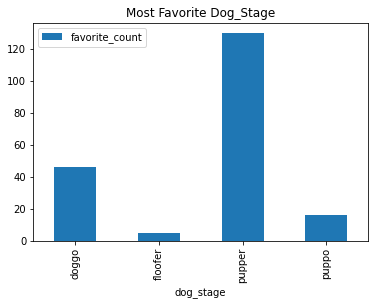

In [67]:
# To obtain a 1-D visualisation in a bar chart for the insight above

df.groupby('dog_stage').favorite_count.count().plot(kind= 'bar',
title = 'Most Favorite Dog_Stage')
plt.legend();

In [80]:
# To determine the rating numerator that occurs most frequently

df.rating_numerator.value_counts()

12    47
11    45
10    40
13    19
9     14
14    12
8     11
7      6
27     1
3      1
6      1
Name: rating_numerator, dtype: int64

So 12 is the most frequently occuring dog rating numerator

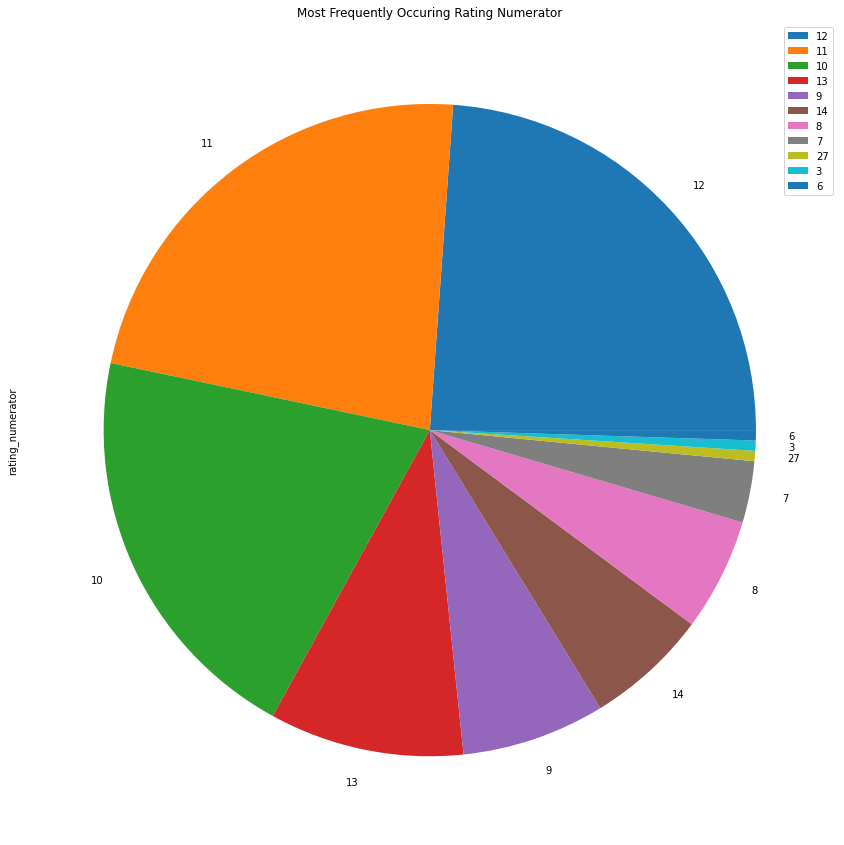

In [82]:
# To produce a visualisation for the insight above

df.rating_numerator.value_counts().plot(kind= 'pie', figsize = (15,15),
title = 'Most Frequently Occuring Rating Numerator')
plt.legend()

No handles with labels found to put in legend.


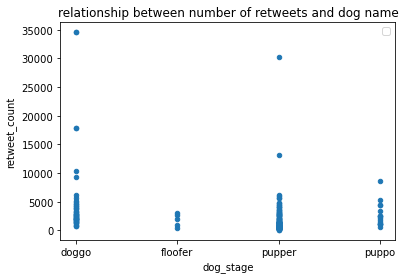

In [87]:
# To determine if the stage of a dog has any bearing on the number of retweets by twitter users

df.plot(x = "dog_stage", y = "retweet_count", kind = "scatter", title='relationship between number of retweets and dog name')
plt.legend()

So, there is actually no correlation, hence the dog stages have no bearing on the number of retweets by twitter users